In [2]:
# 1. Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import BinaryCrossentropy

2025-06-14 14:46:41.144148: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749912401.428964      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749912401.506378      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
# Load the dataset
data = load_breast_cancer()

In [4]:
# Show the keys in the dataset
print(data.keys())

# Description of the dataset
print(data['DESCR'])

# Feature names
print("Feature names:", data.feature_names)

# Target names (labels)
print("Target names:", data.target_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these 

In [5]:
# Convert to a pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Preview the dataset
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [6]:
# 2. Initialize input/output values the Dataset
X = data.data
y = data.target
print("X", X)
print("y", y)

X [[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
y [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 

In [7]:
# 3. Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


In [8]:
# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
input_shape=(X_train.shape[0],)
print("input_shape", input_shape)

(455, 30)
(455,)
input_shape (455,)


Purpose	Correct Value

Number of features	X_train.shape[1] (→ 30)

Number of samples	X_train.shape[0] (→ 455)

In [9]:
# 5. Build Neural Network Here each Dense represents each layer.For ouput layer we are using sigmoid
model = Sequential([
    Dense(16, activation='relu',input_shape=(X_train.shape[1],)),
    Dropout(0.1),
    Dense(8, activation='relu'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# 6. Compile Model
model.compile(optimizer='adam', # How to update weights
              loss=BinaryCrossentropy(), # What to minimize
              metrics=['accuracy'])   # How to measure performance

# 7. Train Model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=70,
    batch_size=32,
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-14 14:46:58.650536: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7476 - loss: 0.5718 - val_accuracy: 0.8022 - val_loss: 0.4622
Epoch 2/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8232 - loss: 0.4768 - val_accuracy: 0.8571 - val_loss: 0.3974
Epoch 3/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8723 - loss: 0.4173 - val_accuracy: 0.8681 - val_loss: 0.3516
Epoch 4/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8855 - loss: 0.3635 - val_accuracy: 0.8901 - val_loss: 0.3134
Epoch 5/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8967 - loss: 0.3152 - val_accuracy: 0.9121 - val_loss: 0.2831
Epoch 6/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9323 - loss: 0.2729 - val_accuracy: 0.9121 - val_loss: 0.2535
Epoch 7/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9351 - loss: 0.2228 - val_accuracy: 0.9231 - val_loss: 0.2272
Epoch 8/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9284 - loss: 0.2244 - val_accuracy: 0.9341 - val_

How many epochs should you run?

| Epochs                | Effect                                      |
| --------------------- | ------------------------------------------- |
| Too few (e.g., 1–5)   | Model **underfits** — hasn’t learned enough |
| Enough (e.g., 50–100) | Model learns well                           |
| Too many (e.g., 500+) | Risk of **overfitting**                     |


In [10]:
#Evaluate on Test Data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {test_accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9467 - loss: 0.0930 

✅ Test Accuracy: 0.9474


In [11]:
#Lets try to predit on data
model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[9.6340221e-01],
       [2.1086939e-06],
       [5.6245452e-04],
       [9.9936408e-01],
       [9.9996370e-01],
       [3.9130762e-13],
       [1.3546771e-10],
       [6.8895309e-03],
       [4.7795150e-01],
       [9.9995714e-01],
       [9.3440527e-01],
       [9.3263267e-03],
       [9.9799258e-01],
       [2.5884006e-02],
       [9.9997026e-01],
       [2.0530245e-04],
       [9.9991786e-01],
       [9.9996918e-01],
       [9.9999505e-01],
       [1.4111346e-07],
       [9.5826966e-01],
       [9.9363655e-01],
       [6.1783828e-11],
       [9.9977189e-01],
       [9.9981493e-01],
       [9.9981803e-01],
       [9.9998105e-01],
       [9.9805617e-01],
       [9.9709088e-01],
       [4.8788475e-08],
       [9.9983114e-01],
       [9.9998343e-01],
       [9.9898714e-01],
       [9.9787897e-01],
       [9.9981081e-01],
       [9.9979573e-01],
       [2.7541829e-02],
       [9.9979311e-01],
       [1.1863054e-05],
       [9.0819359e-01],
       [9.9994957e-01],
       [6.593109

This is the model's predicted probability that each sample is class 1 (i.e., malignant if you're using the breast cancer dataset where target = 0 is benign and 1 is malignant).


| **Raw Output** | **Meaning**                           | **Final Class**            |
| -------------- | ------------------------------------- | -------------------------- |
| `0.8763`       | 87.63% probability of being class `1` | Likely `1` (malignant)     |
| `0.0231`       | 2.31% probability of being class `1`  | Likely `0` (benign)        |
| `0.9987`       | 99.87% probability of being class `1` | Definitely `1` (malignant) |


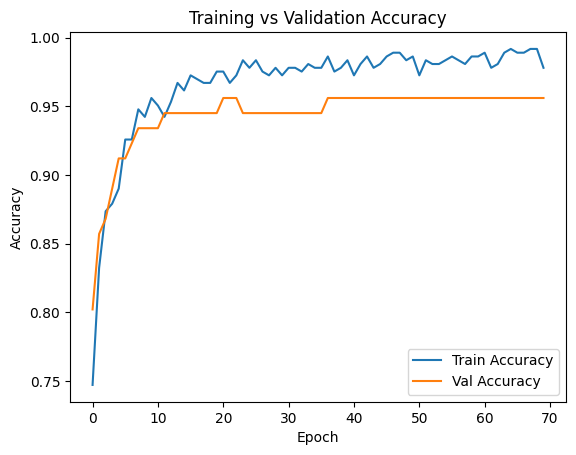

In [12]:
# 9. Optional: Plot Training History
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

# To save the model
.h5 is a file format used to store large amounts of data efficiently.
It stands for HDF5 = Hierarchical Data Format version 5

It is widely used in machine learning for saving trained models

In [13]:
# To save the model
model.save('breast_cancer_model.h5')

# Predict the model
preds = model.predict(X_test)
predicted_class = (preds > 0.5).astype(int)

# Save predictions to CSV
df = pd.DataFrame({'prediction': predicted_class.flatten()})
df.to_csv('predictions.csv', index=False)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
